In [11]:
%matplotlib inline

In [12]:
from matplotlib import pyplot as plt
from IPython import display


def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize


def bbox_to_rect(bbox, color):  # 本函数已保存在d2lzh包中方便以后使用
    # 将边界框(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib格式：
    # ((左上x, 左上y), 宽, 高)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

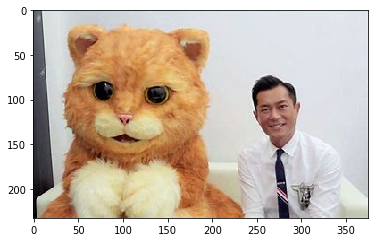

In [13]:
path = 'images/thGAK1R60W.jpg'

img = plt.imread(path)
plt.imshow(img);  # 加分号只显示图

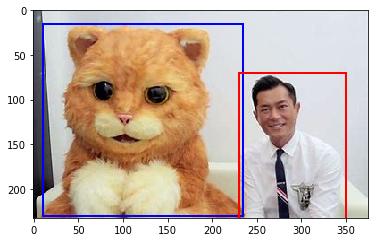

In [14]:
# bbox是bounding box的缩写
dog_bbox, cat_bbox = [10, 15, 235, 230], [230, 70, 350, 235]

fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

In [60]:
import numpy as np


def anchor_scale(sizes, ratios):
    group = []
    for s in sizes:
        group.append((ratios[0], s))

    for r in ratios[1:]:
        group.append((r, sizes[0]))

    return np.asanyarray([(s/np.sqrt(r), s*np.sqrt(r)) for r, s in group])

In [61]:
sizes=[0.75, 0.5, 0.25]
ratios=[1, 2, 0.5]

scale = anchor_scale(sizes, ratios)

In [62]:
scale

array([[0.75      , 0.75      ],
       [0.5       , 0.5       ],
       [0.25      , 0.25      ],
       [0.53033009, 1.06066017],
       [1.06066017, 0.53033009]])

In [63]:
h, w = img.shape[:-1]
scale[:,0] *= h
scale[:,1] *= w

In [64]:
K = scale/2
K

array([[ 87.375     , 140.625     ],
       [ 58.25      ,  93.75      ],
       [ 29.125     ,  46.875     ],
       [ 61.78345501, 198.87378221],
       [123.56691001,  99.4368911 ]])

In [65]:
K.max(0)

array([123.56691001, 198.87378221])

In [66]:
K.max(1)

array([140.625     ,  93.75      ,  46.875     , 198.87378221,
       123.56691001])

In [44]:
from mxnet import contrib, gluon, nd

In [46]:
print(h, w)
X = nd.random.uniform(shape=(1, 3, h, w))  # 构造输入数据
Y = contrib.nd.MultiBoxPrior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape

233 375


(1, 436875, 4)

In [55]:
boxes = Y.reshape((h, w, 5, 4))
boxes[0, 0, :, :]


[[-0.23166667 -0.37285408  0.23433332  0.37714592]
 [-0.15400001 -0.24785408  0.15666667  0.25214592]
 [-0.07633334 -0.12285408  0.079       0.12714592]
 [-0.32817844 -0.26301914  0.3308451   0.26731098]
 [-0.16342255 -0.5281842   0.1660892   0.53247607]]
<NDArray 5x4 @cpu(0)>

In [67]:
sizes=[0.75, 0.5, 0.25]
ratios=[1, 2, 0.5]

scale = anchor_scale(sizes, ratios)
scale

array([[0.75      , 0.75      ],
       [0.5       , 0.5       ],
       [0.25      , 0.25      ],
       [0.53033009, 1.06066017],
       [1.06066017, 0.53033009]])

In [58]:
b = scale/2
b

array([[0.57735027, 0.4330127 ],
       [0.70710678, 0.35355339],
       [1.        , 0.25      ],
       [1.15470054, 0.8660254 ],
       [0.28867513, 0.21650635]])

In [68]:
a = boxes[0, 0, :, :]
a


[[-0.23166667 -0.37285408  0.23433332  0.37714592]
 [-0.15400001 -0.24785408  0.15666667  0.25214592]
 [-0.07633334 -0.12285408  0.079       0.12714592]
 [-0.32817844 -0.26301914  0.3308451   0.26731098]
 [-0.16342255 -0.5281842   0.1660892   0.53247607]]
<NDArray 5x4 @cpu(0)>

In [86]:
h_max = b[:, 0].max(0)
w_max = b[:, 1].max(0)

In [87]:
w_max

0.8660254037844386

In [88]:
h_max - b[:, 0] 

array([0.57735027, 0.44759376, 0.15470054, 0.        , 0.8660254 ])